In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

In [2]:
data = {
    'job_title': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['Excel', 'SQL', 'Python'], ['Python', 'R'], ['AWS', 'Python', 'Airflow']]
}
df_skill_lists = pd.DataFrame(data)

df_skill_lists

,job_title,job_skills
0,Data Analyst,"[Excel, SQL, Python]"
1,Data Scientist,"[Python, R]"
2,Data Engineer,"[AWS, Python, Airflow]"


In [3]:
df_skill_lists.explode('job_skills')

,job_title,job_skills
0,Data Analyst,Excel
0,Data Analyst,SQL
0,Data Analyst,Python
1,Data Scientist,Python
1,Data Scientist,R
2,Data Engineer,AWS
2,Data Engineer,Python
2,Data Engineer,Airflow


In [4]:
df_skill_lists.explode('job_skills').value_counts('job_skills')

job_skills
Python     3
AWS        1
Airflow    1
Excel      1
R          1
SQL        1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Python'),
  Text(1, 0, 'AWS'),
  Text(2, 0, 'Airflow'),
  Text(3, 0, 'Excel'),
  Text(4, 0, 'R'),
  Text(5, 0, 'SQL')])

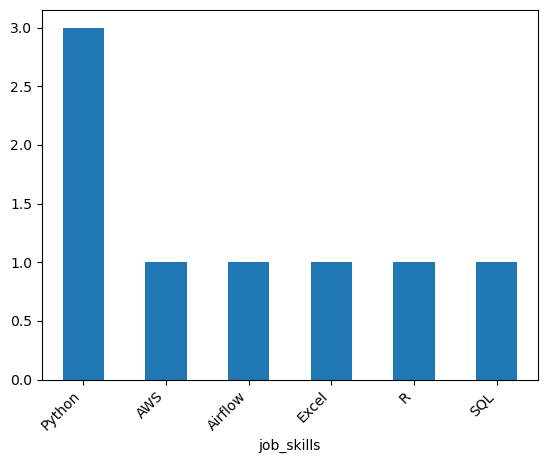

In [5]:
df_skill_lists.explode('job_skills').value_counts('job_skills').plot(kind='bar')
plt.xticks (rotation= 45, ha='right')


In [6]:
# Load the dataset from the CSV file
dataset = load_dataset('csv', data_files=r'C:\Users\lahms\OneDrive\Documents\Sam - Data Analyst\data_jobs.csv')

# Convert the dataset to a pandas DataFrame
df = dataset['train'].to_pandas()

# Data Cleaning: Convert the 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df ['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Show the first few rows of the DataFrame to check the results
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [7]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [8]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.

    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.

        .. versionadded:: 1.3.0
            Multi-column explode

    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.

    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.

    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns to explode is empty

In [9]:
df.explode('job_skills')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [10]:
df_exploded = df.explode('job_skills')

In [11]:
df_exploded['job_skills'].value_counts().head(10)

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sql'),
  Text(1, 0, 'python'),
  Text(2, 0, 'aws'),
  Text(3, 0, 'azure'),
  Text(4, 0, 'r'),
  Text(5, 0, 'tableau'),
  Text(6, 0, 'excel'),
  Text(7, 0, 'spark'),
  Text(8, 0, 'power bi'),
  Text(9, 0, 'java')])

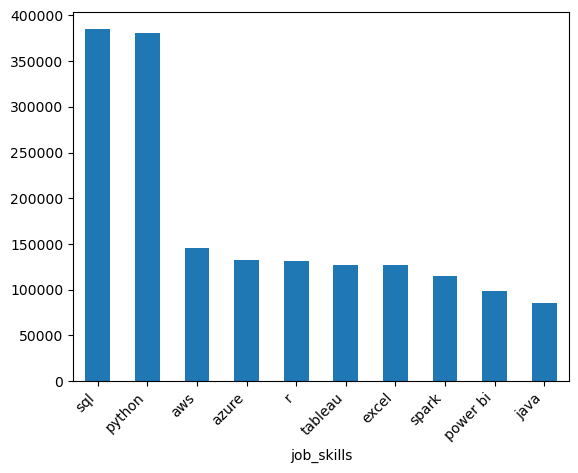

In [12]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

In [13]:
df_exploded.groupby(['job_title_short', 'job_skills']).size()

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [14]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [15]:
df_exploded.groupby(['job_title_short', 'job_skills']).size()
type(skills_count)

pandas.core.series.Series

In [16]:
df_skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
type(skills_count)

pandas.core.series.Series

In [17]:
df_skills_count = skills_count.reset_index()
df_skills_count

,job_title_short,job_skills,0
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [18]:
df_skills_count = skills_count.reset_index(name='Skill_Count')
df_skills_count 

,job_title_short,job_skills,Skill_Count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [19]:
df_skills_count = skills_count.reset_index(name='Skill_Count')
df_skills_count = df_skills_count.sort_values(by = 'Skill_Count', ascending = False)
df_skills_count

,job_title_short,job_skills,Skill_Count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [20]:
job_title = 'Data Analyst'
top_skills = 15

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final

,job_title_short,job_skills,Skill_Count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


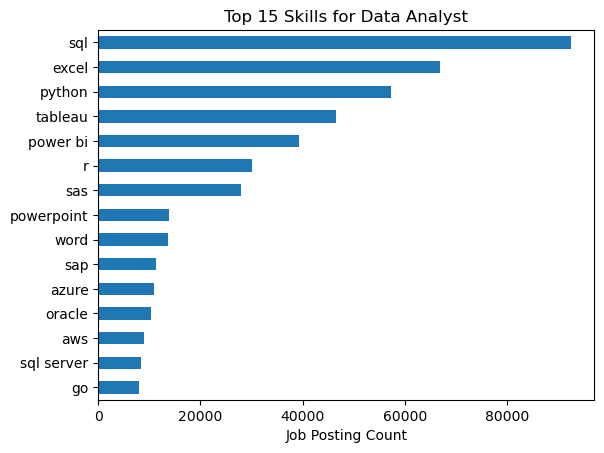

In [21]:
job_title = 'Data Analyst'
top_skills = 15
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final.plot(kind = 'barh', x= 'job_skills', y = 'Skill_Count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()